In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
header_names = [
    'age',
    'class_worker',
    'det_ind_code',
    'det_occ_code',
    'education',
    'wage_per_hour',
    'hs_college',
    'marital_stat',
    'major_ind_code',
    'major_occ_code',
    'race',
    'hisp_origin',
    'sex',
    'union_member',
    'unemp_reason',
    'full_or_part_emp',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'tax_filer_stat',
    'region_prev_res',
    'state_prev_res',
    'det_hh_fam_stat',
    'det_hh_summ',
    'instance_weight', ## this field is not used as a feature
    'mig_chg_msa',
    'mig_chg_reg',
    'mig_move_reg',
    'mig_same',
    'mig_prev_sunbelt',
    'num_emp',
    'fam_under_18',
    'country_father',
    'country_mother',
    'country_self',
    'citizenship',
    'own_or_self',
    'vet_question',
    'vet_benefits',
    'weeks_worked',
    'year',
    'income_50k',
]



In [3]:
# df1=pd.read_csv("../input/ml1-project/census-income.data.csv",header = None, names = header_names)
# df2=pd.read_csv("../input/testset/census-income.test.csv",header = None, names = header_names)

df1=pd.read_csv("data/census-income.data.csv",header = None, names = header_names)
df2=pd.read_csv("data/census-income.test.csv",header = None, names = header_names)

df = pd.concat([df1, df2]) #The test file, labeled so it can be merged with original 
df.drop(columns = ['instance_weight'])

,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
99758,61,Private,8,36,11th grade,0,Not in universe,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
99759,24,Self-employed-not incorporated,1,43,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,94,- 50000.
99760,30,Private,45,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Other professional services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


In [4]:
# ## Create a new variable for classification based of if the person recieved a 
# ## college degree
# higer_degrees = [
#     ' Bachelors degree(BA AB BS)', 
#     ' Masters degree(MA MS MEng MEd MSW MBA)', 
#     ' Prof school degree (MD DDS DVM LLB JD)',
#     ' Doctorate degree(PhD EdD)',
# ]
# 
# df['graduated'] = 'no'
# df.loc[df['education'].isin(higer_degrees), 'graduated'] = 'yes'

In [5]:
# df.shape
# df.head()
# list(df.columns)

In [6]:
# sns.scatterplot(data=df, x="capital_gains", y="age", hue="income_50k", alpha=.4)# 

In [7]:
# sns.scatterplot(data=df, x="capital_losses", y="age", hue="income_50k", alpha=.4)

In [8]:
# sns.scatterplot(data=df, x="stock_dividends", y="age", hue="income_50k", alpha=.4)

In [9]:
cols_to_keep=[
    'age', 
    'education', 
    'race', 
    'sex', 
    'capital_gains', 
    'capital_losses', 
    'stock_dividends', 
    'tax_filer_stat', 
    'det_hh_summ', 
    'own_or_self', 
    'vet_benefits', 
    'weeks_worked',
    'income_50k'
]

df_trunc = df.loc[:,cols_to_keep]

df_trunc.head()

,age,education,race,sex,capital_gains,capital_losses,stock_dividends,tax_filer_stat,det_hh_summ,own_or_self,vet_benefits,weeks_worked,income_50k
0,73,High school graduate,White,Female,0,0,0,Nonfiler,Other relative of householder,0,2,0,- 50000.
1,58,Some college but no degree,White,Male,0,0,0,Head of household,Householder,0,2,52,- 50000.
2,18,10th grade,Asian or Pacific Islander,Female,0,0,0,Nonfiler,Child 18 or older,0,2,0,- 50000.
3,9,Children,White,Female,0,0,0,Nonfiler,Child under 18 never married,0,0,0,- 50000.
4,10,Children,White,Female,0,0,0,Nonfiler,Child under 18 never married,0,0,0,- 50000.


In [10]:
df_trunc.loc[df_trunc.income_50k == " - 50000.", 'income_50k'] = "below_50k"

df_trunc.loc[df_trunc.income_50k == " 50000+.", 'income_50k'] = "above_50k"

# df_trunc["income_50k"].unique()



In [11]:
ind_cols=['education', 'race', 'sex', 'tax_filer_stat', 'det_hh_summ', "own_or_self", "vet_benefits", "income_50k"]

# df_trunc.loc[:,ind_cols].head()

for col in ind_cols:
    df_trunc[col] = df_trunc[col].astype('category')
    
# df_trunc.info() 

In [12]:
tmp_df = pd.get_dummies(df_trunc['income_50k'])

df_trunc = pd.concat((df_trunc,tmp_df),axis=1)

df_trunc=df_trunc.drop(['income_50k', 'below_50k'], axis=1)

print(list(df_trunc.columns))

print(df_trunc.head())


['age', 'education', 'race', 'sex', 'capital_gains', 'capital_losses', 'stock_dividends', 'tax_filer_stat', 'det_hh_summ', 'own_or_self', 'vet_benefits', 'weeks_worked', 'above_50k']
   age                    education                        race      sex  \
0   73         High school graduate                       White   Female   
1   58   Some college but no degree                       White     Male   
2   18                   10th grade   Asian or Pacific Islander   Female   
3    9                     Children                       White   Female   
4   10                     Children                       White   Female   

   capital_gains  capital_losses  stock_dividends      tax_filer_stat  \
0              0               0                0            Nonfiler   
1              0               0                0   Head of household   
2              0               0                0            Nonfiler   
3              0               0                0            Nonfile

In [13]:
y = df_trunc['above_50k']

X = df_trunc.drop('above_50k', axis=1)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

cols_to_scale = ['age', 'capital_gains', 'capital_losses', 'stock_dividends', 'weeks_worked']

scaler = StandardScaler()

# categorical_features = ['embarked', 'sex', 'pclass']
cat_cols = ind_cols[:-1]

one_encode = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, cols_to_scale),
        ('cat', one_encode, cat_cols)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('lr_classifier', LogisticRegression(max_iter=1000))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr_clf.fit(X_train, y_train)
print("model score: " + str(round((lr_clf.score(X_test, y_test) * 100),2)) + "%")

model score: 95.03%


In [15]:
from sklearn import metrics as mt

y_hat = lr_clf.predict(X_test) 

acc = mt.accuracy_score(y_test,y_hat)
# prec = mt.precision_score(y_test,y_hat)
# recall = mt.recall_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)



print("accuracy", acc )
# print("precision",prec)
# print("recall",recall)
print("confusion matrix\n",conf)



accuracy 0.9503316237031592
confusion matrix
 [[55788   483]
 [ 2490  1096]]


In [16]:
fpr, tpr, thresholds = mt.roc_curve(y_test, y_hat, pos_label=1)
mt.auc(fpr, tpr)

0.6485247775576687

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('lr_classifier', SGDClassifier(loss="hinge", penalty="l2", max_iter=100))])


# clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
# sgd_clf.fit(X, y)
# SGDClassifier(max_iter=5)
sgd_clf.fit(X_train, y_train)
print("model score: " + str(round((sgd_clf.score(X_test, y_test) * 100),2)) + "%")

model score: 94.74%


In [18]:
# from sklearn.svm import SVC
# 
# svm_clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('svm_classifier', SVC(kernel='rbf', degree=3, gamma='auto'))])
# 
# # svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto')
# 
# # Fit the model to the training data
# svm_clf.fit(X_train, y_train)
# 
# # Calculate accuracy scores on both train and test data
# accuracy_train = accuracy_score(y_train, svm_clf.predict(X_train))
# accuracy_test = accuracy_score(y_test, svm_clf.predict(X_test))
# 
# print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

In [19]:
#def Scale_OneHot_df(df, cols_to_scale, ind_col):
#scaler = StandardScaler()

#df_scaled = X_train.copy()
#
#features = df_scaled[cols_to_scale]
#
#scaler = StandardScaler().fit(features.values)
#
#features = scaler.transform(features.values)
#
#df_scaled[cols_to_scale] = features
#
#print(df_scaled.head())
#print(list(df_scaled.columns))
#
## tmp_df = pd.get_dummies(df_scaled.loc[:,ind_cols[:-1]])
#
## print(tmp_df.head())
## 
#
#tmp_df = pd.get_dummies(df_scaled[ind_cols[:-1]])
#
#df_scaled_tmp = pd.concat((df_scaled,tmp_df),axis=1)
#
#print(list(df_scaled_tmp.columns))

# df_trunc=df_trunc.drop(['income_50k', 'below_50k'], axis=1)

# df_ohe = OneHotEncoder()
# 
# df_scaled_ohe=df_ohe.fit(df_scaled[ind_cols[:-1]])
# 
# print(df_scaled_ohe.head())

# 

# print(df_scaled_ind.head())

# df_scaled_inds=df_scaled_ind.drop([ind_cols[:-1]], axis=1)  

# print(df_scaled_inds.head())
# 
# return df_scaled_inds
    

In [20]:
def Scale_OneHot_df(df):
    # scaler = StandardScaler()

    df_scaled = df.copy()

    features = df_scaled[cols_to_scale]

    scaler = StandardScaler().fit(features.values)

    features = scaler.transform(features.values)

    df_scaled[cols_to_scale] = features

    tmp_df = pd.get_dummies(df_scaled.loc[:,ind_cols[:-1]], drop_first=True)
    
    df_scaled_tmp = pd.concat((df_scaled,tmp_df),axis=1)

    df_scaled_inds=df_scaled_tmp.drop([
        'education', 
        'race', 
        'sex', 
        'tax_filer_stat', 
        'det_hh_summ', 
        "own_or_self", 
        "vet_benefits"], 
        axis=1)  
    
    return df_scaled_inds
   

In [21]:
X_train_ohe = Scale_OneHot_df(X_train)

X_test_ohe = Scale_OneHot_df(X_test)

# print(X_train_ohe)

In [22]:
# lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) 

from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_ohe, y_train)

y_pred = lr.predict(X_test_ohe)


mt.accuracy_score(y_test,y_pred)


0.9505153950248091

In [23]:
weights = lr.coef_.T # take transpose to make a column vector
variable_names = X_train_ohe.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

age has weight of 0.7855442469196692
capital_gains has weight of 0.534626517185818
capital_losses has weight of 0.16575785407322288
stock_dividends has weight of 0.3547359278685988
weeks_worked has weight of 1.2235525963087173
education_ 11th grade has weight of 0.18992500549590016
education_ 12th grade no diploma has weight of 0.31313908423644476
education_ 1st 2nd 3rd or 4th grade has weight of -0.34030970188519055
education_ 5th or 6th grade has weight of -0.592016239088582
education_ 7th and 8th grade has weight of -0.2547552317618063
education_ 9th grade has weight of -0.2255389196935428
education_ Associates degree-academic program has weight of 1.5220216794552754
education_ Associates degree-occup /vocational has weight of 1.3049510791208412
education_ Bachelors degree(BA AB BS) has weight of 2.306617139154883
education_ Children has weight of -0.7024532498909444
education_ Doctorate degree(PhD EdD) has weight of 3.2928461352185083
education_ High school graduate has weight of 0

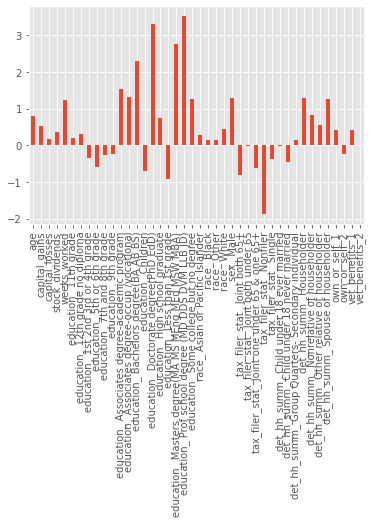

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr.coef_[0],index=X_train_ohe.columns)
weights.plot(kind='bar')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={
    "C": [0.001, 0.05, 0.01, 0.1, 1, 10]
}
logreg=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_ohe, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
# from sklearn.feature_selection import RFE
# # Create the RFE with a LogisticRegression estimator and 3 features to select
# rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10, verbose=1)
# 
# # Fits the eliminator to the data
# rfe.fit(X_train, y_train)
# 
# # Print the features and their ranking (high = dropped early on)
# print(dict(zip(X.columns, rfe.ranking_)))
# 
# # Print the features that are not eliminated
# print(X.columns[rfe.support_])
# 
# # Calculates the test set accuracy
# acc = accuracy_score(y_test, rfe.predict(X_test))
# print("{0:.1%} accuracy on test set.".format(acc)) 
# 



## https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py

## https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
lr.n_iter_